# 1. 라이브러리 import 및 데이터 불러오기

In [1]:
# 필수 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings

import tensorflow as tf
import keras
from keras import layers, Input, models
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('/content/drive/MyDrive/TNT/산업인공지능/실습/Task2/LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


# 2. EDA

In [3]:
df.info()

# waferMap : waferMap
# die size : chip의 wafer상에서 면적  # die : chip
# lotName : lot - 제조단위가 동일한 조건 아래에서 만들어진 균일한 특성 및 품질을 갖는 제품군, wafer는 lot 단위로 제조되며 일반적으로 lot당 최대 25개의 wafer 제조
# waferIndex : 하나의 lot에서 각 wafer에 붙는 번호
# trianTestLabel : The training / test set were already split by domain experts
# failureType : 결함 타입

# 데이터 개수 : 811457
# object 타입 : waferMap, lotName, trianTestLabel, failureType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
# trianTestLabel 이름 변경
df.rename(columns = {'trianTestLabel':'trainTestLabel'}, inplace = 'True')
df.columns

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trainTestLabel',
       'failureType'],
      dtype='object')

In [5]:
df.head(26)

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,6.0,[[Training]],[[none]]
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,7.0,[[Training]],[[none]]
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,8.0,[[Training]],[[none]]
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,9.0,[[Training]],[[none]]
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,10.0,[[Training]],[[none]]


In [6]:
df.tail()

# trainTestLabel, failureType 결측치 존재

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


## 1) 데이터 정리

In [7]:
df['trainTestLabel'][0]

array([['Training']], dtype='<U8')

In [8]:
df['trainTestLabel'][0].shape

(1, 1)

In [9]:
df['trainTestLabel'][811455]

array([], shape=(0, 0), dtype=float64)

In [10]:
# trainTestLabel, failureType [] 제거하는 함수
def extract(x):
  if x.shape == (1, 1):
    return x[0][0]
  
  else:
    return None

In [11]:
# trainTestLabel, failureType [] 제거
df['trainTestLabel'] = df['trainTestLabel'].apply(lambda x: extract(x))
df['failureType'] = df['failureType'].apply(lambda x: extract(x))

In [12]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [13]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,None,None
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,None,None


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [15]:
# null 제거
df2 = df.dropna(axis = 0)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        172950 non-null  object 
 1   dieSize         172950 non-null  float64
 2   lotName         172950 non-null  object 
 3   waferIndex      172950 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.2+ MB


In [17]:
df2.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring


## 2) 데이터 확인

### (1) 범주형 데이터 ['lotName', 'waferIndex', 'trainTestLabel', 'failureType']

In [18]:
# unique 값 확인하는 함수
def unique(x):
  print("--------< ", x.name, " >--------")
  print("unique : ", x.unique())
  print("num of unique : ", x.unique().shape[0], "\n")
  print(x.value_counts(), "\n\n")

# unique 값 확인
categorical_cols = ['lotName', 'waferIndex', 'trainTestLabel', 'failureType'] # 범주형 데이터
df2[categorical_cols].apply(lambda x: unique(x))


# lotName, waferIndex : one-hot encoding을 해서 넣을 만큼 중요한 데이터는 아닌 듯
# trainTestLabel : Test > train이기 때문에 무시하고 다시 train_test_split 하는게 좋을 듯

--------<  lotName  >--------
unique :  ['lot1' 'lot2' 'lot3' ... 'lot47540' 'lot47541' 'lot47542']
num of unique :  10762 

lot46654    25
lot45466    25
lot43047    25
lot42169    25
lot44530    25
            ..
lot1530      1
lot24095     1
lot36623     1
lot13526     1
lot8554      1
Name: lotName, Length: 10762, dtype: int64 


--------<  waferIndex  >--------
unique :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
num of unique :  25 

22.0    6968
12.0    6955
15.0    6951
25.0    6951
16.0    6942
6.0     6939
3.0     6939
18.0    6937
14.0    6934
1.0     6933
2.0     6922
10.0    6921
21.0    6916
23.0    6916
8.0     6915
20.0    6902
17.0    6901
11.0    6900
5.0     6899
13.0    6899
24.0    6894
7.0     6894
19.0    6886
4.0     6882
9.0     6854
Name: waferIndex, dtype: int64 


--------<  trainTestLabel  >--------
unique :  ['Training' 'Test']
num of unique :  2 

Test        118595
Training     54355
Name: train

lotName           None
waferIndex        None
trainTestLabel    None
failureType       None
dtype: object

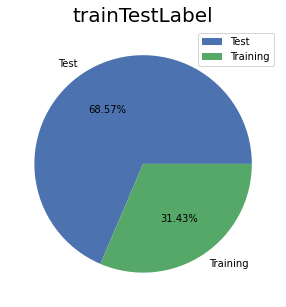

In [19]:
# pie chart : trainTestLabel

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['trainTestLabel'].value_counts().index
size = df2['trainTestLabel'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('trainTestLabel', fontsize = 20)
plt.legend()
plt.show()

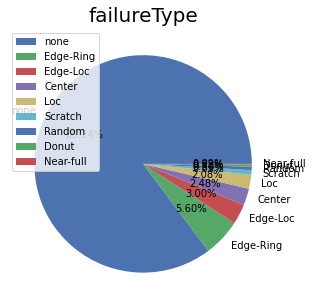

In [20]:
# pie chart : failureType

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['failureType'].value_counts().index
size = df2['failureType'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

In [21]:
labels

Index(['none', 'Edge-Ring', 'Edge-Loc', 'Center', 'Loc', 'Scratch', 'Random',
       'Donut', 'Near-full'],
      dtype='object')

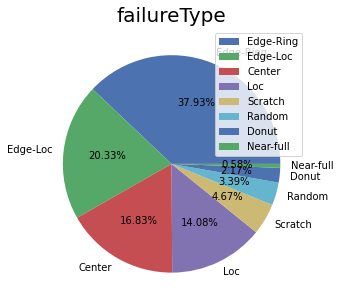

In [22]:
# pie chart : failureType  # none 제외

plt.rcParams['figure.figsize'] = (5,5)

plt.style.use('seaborn-deep')
plt.pie(size.drop('none'), labels = np.delete(labels, 0), autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

### (2) 이미지 데이터 ['waferMap']

In [23]:
df2['waferMap'][0].shape

(45, 48)

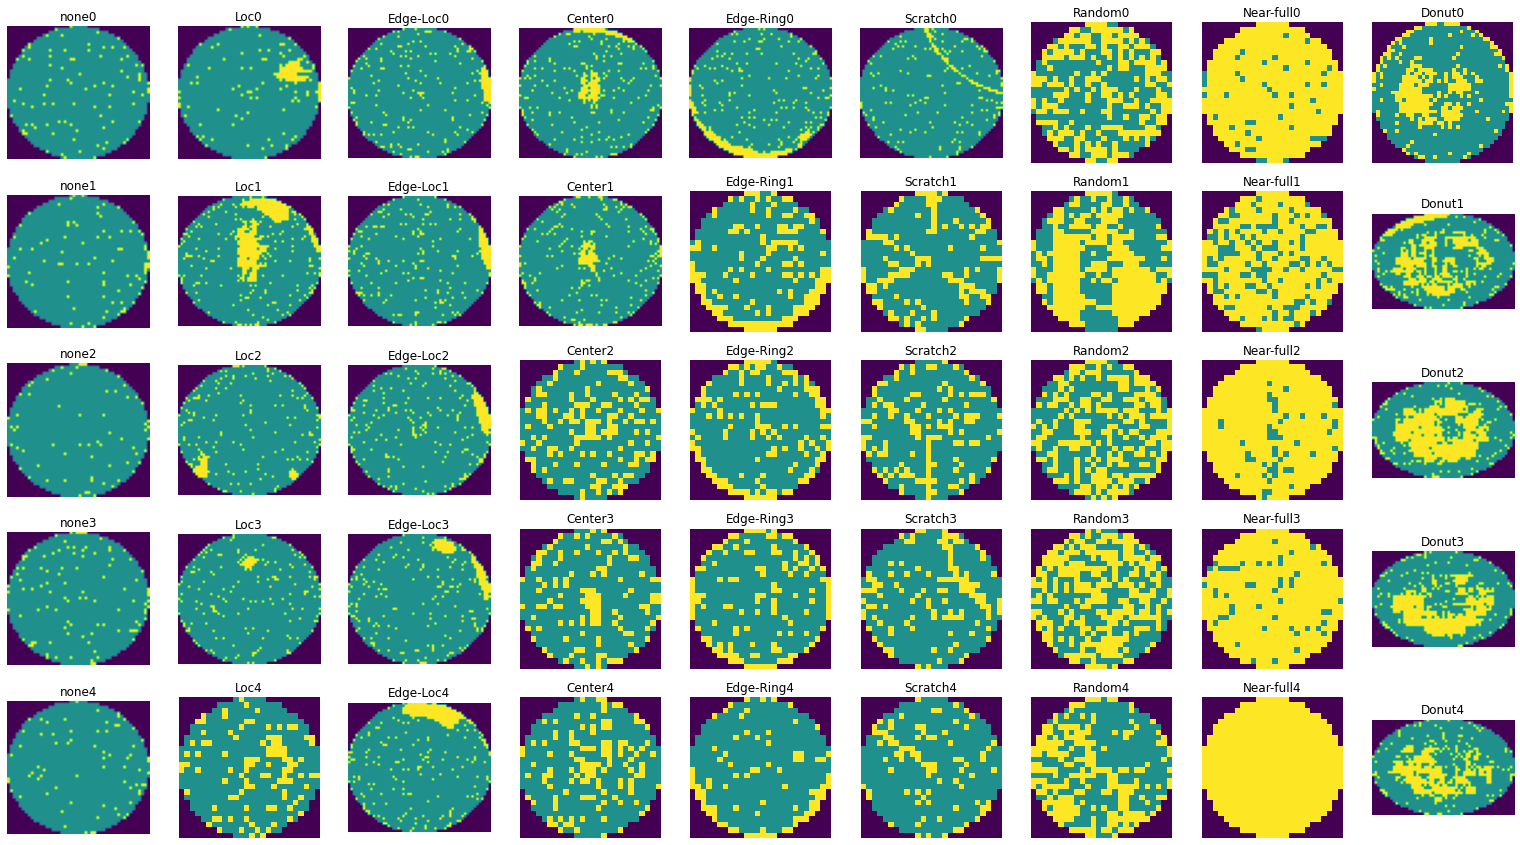

In [24]:
# 시각화

failureType_cols = df2['failureType'].unique()

rows = 5
cols = len(failureType_cols)
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(cols):
  for row, wafermap in enumerate(df2[df2['failureType'] == failureType_cols[col]]['waferMap'][:rows]):
    r = row
    c = col
    ax = axes[r][c]
    ax.imshow(wafermap)
    ax.set_title(failureType_cols[col] + str(row))
    ax.axis('off')

plt.show()

# 이미지 크기가 다른가?

In [25]:
# 이미지 크기 확인

df2['waferMap'].apply(lambda x: x.shape).unique()

array([(45, 48), (53, 58), (26, 26), (70, 58), (60, 40), (37, 37),
       (37, 55), (41, 57), (39, 39), (62, 75), (50, 43), (43, 43),
       (36, 34), (42, 43), (75, 63), (32, 36), (102, 66), (54, 71),
       (29, 29), (38, 45), (41, 41), (118, 84), (54, 42), (42, 29),
       (49, 39), (35, 38), (41, 56), (43, 42), (26, 25), (30, 30),
       (33, 29), (34, 34), (52, 55), (35, 31), (30, 34), (50, 39),
       (33, 33), (32, 29), (63, 62), (34, 35), (39, 31), (38, 36),
       (69, 73), (25, 27), (113, 71), (26, 30), (29, 30), (40, 40),
       (87, 89), (70, 36), (56, 41), (89, 76), (52, 59), (33, 24),
       (36, 36), (45, 46), (76, 64), (87, 74), (53, 54), (42, 61),
       (114, 90), (44, 44), (35, 36), (64, 71), (31, 28), (75, 75),
       (137, 116), (39, 37), (30, 31), (47, 42), (27, 30), (45, 45),
       (51, 30), (72, 43), (59, 55), (58, 59), (62, 76), (29, 45),
       (31, 31), (48, 49), (63, 59), (89, 90), (41, 39), (76, 71),
       (73, 67), (40, 42), (71, 63), (22, 35), (36, 41),

In [26]:
df2['waferMap'].apply(lambda x: x.shape).value_counts()

# 이미지 사이즈 조절이 필요하다

(25, 27)     18781
(26, 26)     14366
(30, 34)     12400
(29, 26)     11751
(27, 25)     10682
             ...  
(27, 15)         1
(58, 54)         1
(71, 70)         1
(53, 44)         1
(43, 133)        1
Name: waferMap, Length: 346, dtype: int64

### (3) 수치형 데이터 ['dieSize']

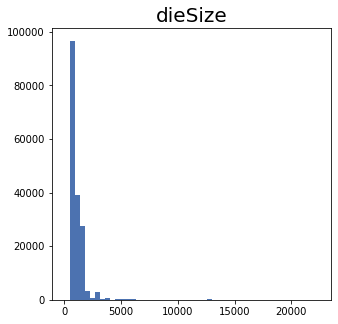

In [27]:
plt.hist(df2['dieSize'], bins = 50)
plt.title('dieSize', fontsize = 20)
plt.show()

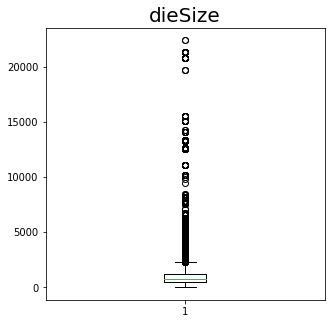

In [28]:
plt.boxplot(df2['dieSize'])
plt.title('dieSize', fontsize = 20)
plt.show()

# 이상치 존재

# 3. 전처리

In [29]:
# 필요없는 데이터 drop

df_new = df2.drop(labels = ['lotName', 'waferIndex', 'trainTestLabel'], axis = 1)

In [30]:
def find_dim(x):
    return x.shape

df_new['waferMapDim'] = df_new.waferMap.apply(find_dim)
df_new.sample(5)

,waferMap,dieSize,failureType,waferMapDim
740347,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,none,"(43, 44)"
781394,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1414.0,none,"(42, 44)"
708648,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,none,"(25, 27)"
809699,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",1060.0,none,"(41, 33)"
790439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",1187.0,none,"(51, 30)"


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   waferMap     172950 non-null  object 
 1   dieSize      172950 non-null  float64
 2   failureType  172950 non-null  object 
 3   waferMapDim  172950 non-null  object 
dtypes: float64(1), object(3)
memory usage: 11.6+ MB


In [32]:
df_new['waferMapDim'].value_counts()

(25, 27)     18781
(26, 26)     14366
(30, 34)     12400
(29, 26)     11751
(27, 25)     10682
             ...  
(27, 15)         1
(58, 54)         1
(71, 70)         1
(53, 44)         1
(43, 133)        1
Name: waferMapDim, Length: 346, dtype: int64

In [33]:
failureType_cols

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

In [34]:
for i in range(len(failureType_cols)):
  dim = df_new[df_new['failureType'] == failureType_cols[i]]['waferMapDim'].value_counts()
  print(failureType_cols[i])
  print(dim)

none
(25, 27)    15881
(26, 26)    13489
(30, 34)    11690
(29, 26)    11196
(27, 25)    10425
            ...  
(53, 71)        1
(72, 44)        1
(24, 13)        1
(18, 4)         1
(89, 76)        1
Name: waferMapDim, Length: 106, dtype: int64
Loc
(26, 26)      297
(35, 31)      246
(30, 34)      241
(39, 37)      222
(39, 31)      182
             ... 
(122, 102)      1
(55, 68)        1
(35, 38)        1
(75, 61)        1
(59, 60)        1
Name: waferMapDim, Length: 198, dtype: int64
Edge-Loc
(39, 37)    473
(44, 41)    390
(25, 27)    355
(30, 34)    306
(26, 26)    296
           ... 
(55, 66)      1
(44, 48)      1
(22, 35)      1
(26, 25)      1
(59, 60)      1
Name: waferMapDim, Length: 196, dtype: int64
Center
(25, 27)    2251
(34, 34)     246
(40, 40)     173
(39, 37)     173
(31, 31)     172
            ... 
(72, 80)       1
(66, 77)       1
(58, 54)       1
(65, 66)       1
(42, 43)       1
Name: waferMapDim, Length: 109, dtype: int64
Edge-Ring
(38, 36)      2123
(53, 52

In [35]:
# image resize 

from PIL import Image

def resize_images(img):
  img = Image.fromarray(img)
  img_resize = img.resize((26, 26))
  return np.array(img_resize)
  
df_new['waferMap_resize'] = df_new.waferMap.apply(resize_images)

< PIL resize >

Filters
- NEAREST
- BOX
- BILINEAR
- HAMMING
- BICUBIC
- LANCZOS

생략한 경우에는 기본값인 NEAREST가 설정

필터 설정을 할 때 NEAREST보다 아래로 내려 갈수록 처리시간은 길어지지만 품질은 높음


---
&nbsp;

Filter 자세한 설명 보고 싶으면 아래 블로그 참고

https://ddolcat.tistory.com/690

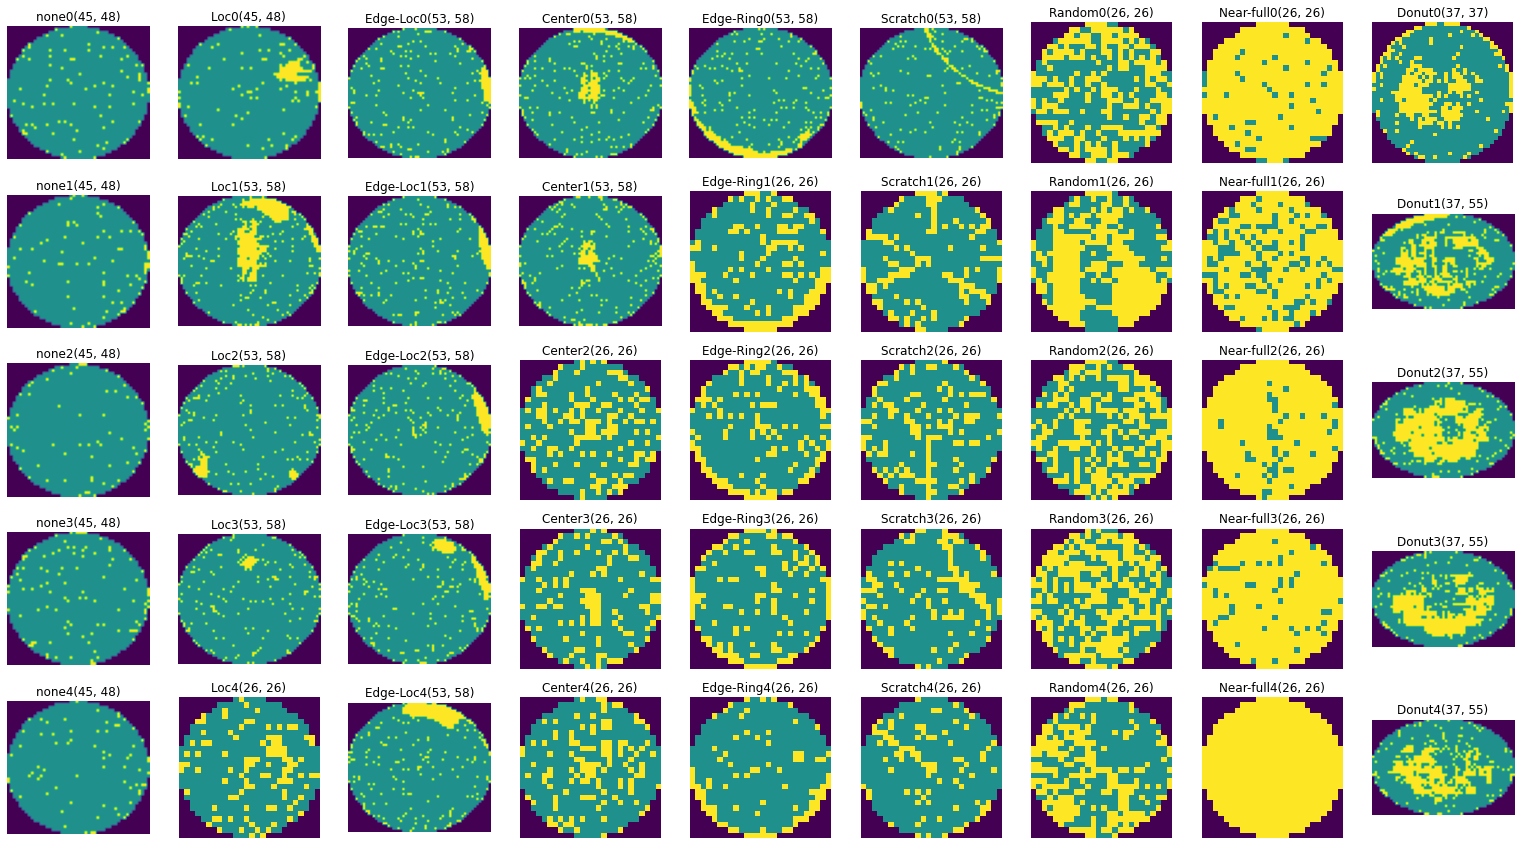

In [36]:
failureType_cols = df_new['failureType'].unique()

rows = 5
cols = len(failureType_cols)
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(cols):
  data = df_new[df_new['failureType'] == failureType_cols[col]][:rows]
  for row in range(rows):
    r = row
    c = col
    ax = axes[r][c]
    ax.imshow(data['waferMap'].iloc[row])
    ax.set_title(failureType_cols[col] + str(row) + str(data['waferMapDim'].iloc[row]))
    ax.axis('off')

plt.show()

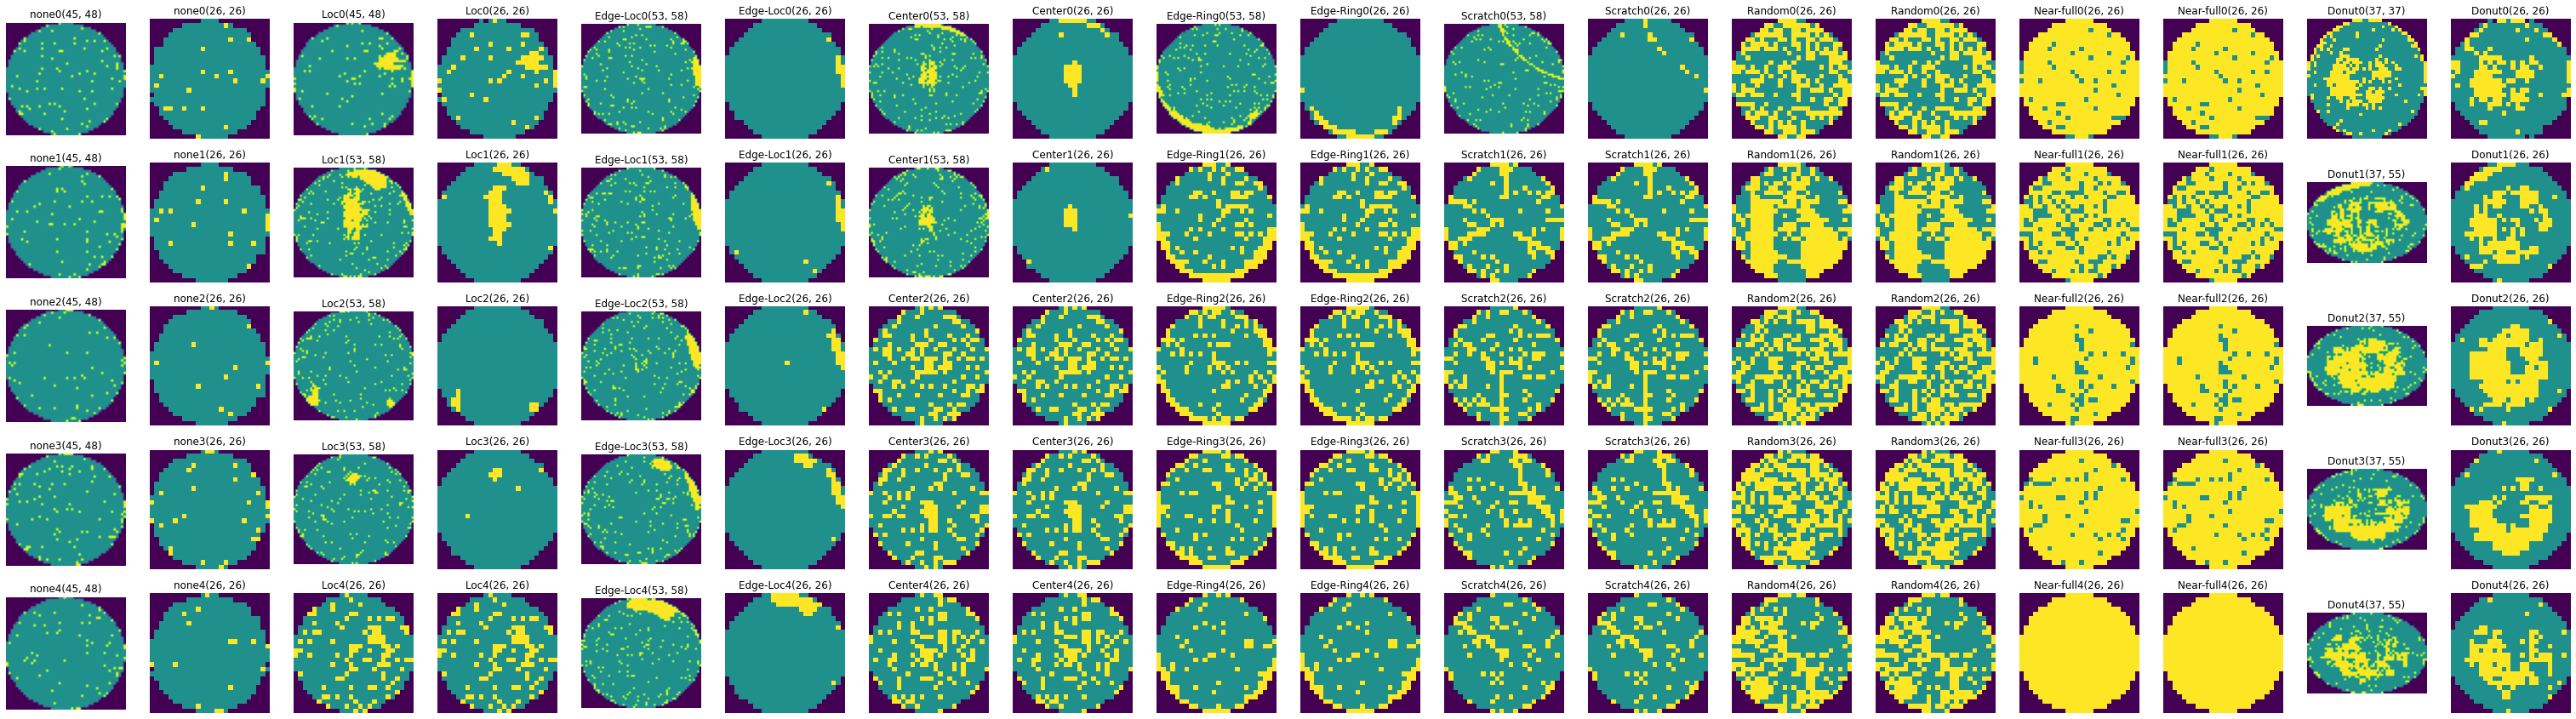

In [37]:
# waferMap과 waferMap_resize 비교

failureType_cols = df_new['failureType'].unique()

rows = 5
cols = len(failureType_cols)*2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(int(cols/2)):
  data = df_new[df_new['failureType'] == failureType_cols[col]][:rows]
  for row in range(rows):
    r = row
    c = 2*col
    ax = axes[r][c]
    ax.imshow(data['waferMap'].iloc[row])
    ax.set_title(failureType_cols[col] + str(row) + str(data['waferMapDim'].iloc[row]))
    ax.axis('off')
    ax2 = axes[r][c + 1]
    ax2.imshow(data['waferMap_resize'].iloc[row])
    ax2.set_title(failureType_cols[col] + str(row) + str((26, 26)))
    ax2.axis('off')

plt.show()

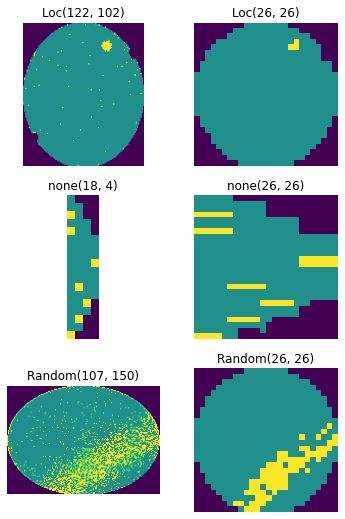

In [38]:
# 사이즈가 특이한 이미지 몇 개 골라서 확인

special_size = [(122, 102), (18, 4), (107, 150)]

fig, axes = plt.subplots(len(special_size), 2, figsize=(2*3, len(special_size)*3))

for i in range(len(special_size)):
  data = df_new[df_new['waferMapDim'] == special_size[i]]
  ax = axes[i][0]
  ax.imshow(data['waferMap'].iloc[0])
  ax.set_title(data['failureType'].iloc[0] + str(special_size[i]))
  ax.axis('off')
  ax2 = axes[i][1]
  ax2.imshow(data['waferMap_resize'].iloc[0])
  ax2.set_title(data['failureType'].iloc[0] + "(26, 26)")
  ax2.axis('off')

plt.show()

In [39]:
# none(18, 4)와 같은 예외 제거

def check_4endpoint(x):
  row = x.shape[0]
  col = x.shape[1]

  if x[0][0] + x[row - 1][0] + x[0][col - 1] + x[row - 1][col - 1] > 0:
    return True
  else:
    return False

df_new['outlier'] = df_new.waferMap.apply(check_4endpoint)

In [40]:
df_new['outlier'].value_counts()

False    172945
True          5
Name: outlier, dtype: int64

In [41]:
df_outlier = df_new[df_new['outlier'] == True]

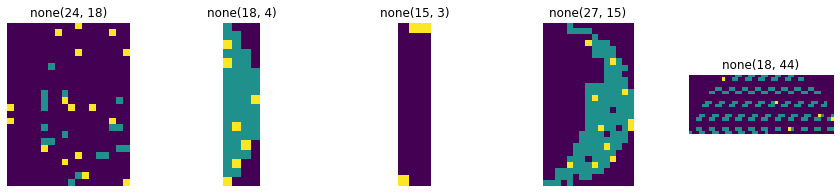

In [42]:
fig, axes = plt.subplots(1, len(df_outlier), figsize=(len(df_outlier)*3, 1*3))

for i in range(len(df_outlier)):
  ax = axes[i]
  ax.imshow(df_outlier['waferMap'].iloc[i])
  ax.set_title(df_outlier['failureType'].iloc[i] + str(df_outlier['waferMapDim'].iloc[i]))
  ax.axis('off')

plt.show()

In [43]:
df_new = df_new[df_new['outlier'] == False]

In [44]:
df_new['outlier'].value_counts()

False    172945
Name: outlier, dtype: int64

In [45]:
# reshape

wafers = df_new['waferMap_resize'].values

images = []
label = []

for i in range(len(df_new)):
  images.append(wafers[i])
  label.append(df_new.iloc[i,:]['failureType'])

In [46]:
images = np.array(images)
label = np.array(label)

print(images.shape)
print(label.shape)

(172945, 26, 26)
(172945,)


In [47]:
# add channel
x = images.reshape((-1, 26, 26, 1))
y = label.reshape((-1,1))

In [48]:
# check dimension
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (172945, 26, 26, 1), y shape : (172945, 1)


In [49]:
faulty_case = np.unique(label)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [50]:
faulty_case_dict = dict()

In [51]:
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y[y == f])))
    faulty_case_dict[i] = f

Center : 4294
Donut : 555
Edge-Loc : 5189
Edge-Ring : 9680
Loc : 3593
Near-full : 149
Random : 866
Scratch : 1193
none : 147426


In [52]:
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w, i, j, int(x[w, i, j])] = 1

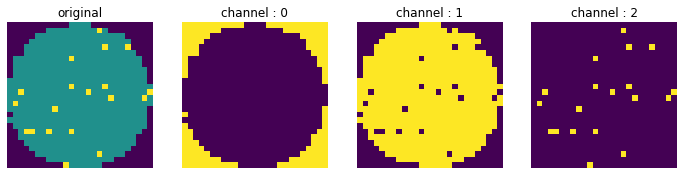

In [53]:
# 이미지로 channel 확인
fig, axes = plt.subplots(1, 4, figsize=(4*3, 1*3))

ax = axes[0]
ax.imshow(x[0, :, :, 0])
ax.set_title("original")
ax.axis('off')

for i in range(3):
  ax = axes[i + 1]
  ax.imshow(new_x[0, :, :, i])
  ax.set_title("channel : {}".format(i))
  ax.axis('off')

plt.show()

In [54]:
#check new x dimension
new_x.shape

(172945, 26, 26, 3)

In [55]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.33,
                                                    stratify=y, random_state=42)

In [56]:
x_train.shape

(115873, 26, 26, 1)

# 4. Data Augmentation

### GAN

Build Model

In [57]:
img_rows = 26
img_cols = 26
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [58]:
def build_generator(img_shape, z_dim):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(256, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(512, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(1024, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(img_rows*img_cols*channels, activation='relu'))
    model.add(keras.layers.Reshape(img_shape))

    return model

def build_discriminator(img_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=img_shape))
    model.add(keras.layers.Dense(1024))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model

In [59]:
def build_gan(generator, discriminator):
  model = keras.models.Sequential()
  
  # Combined Generator -> Discriminator model
  model.add(generator)
  model.add(discriminator)

  return model

In [60]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam,
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=adam)

Training

In [57]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [62]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1, 2]
    gen_imgs = np.where(gen_imgs < 0.5, 0, gen_imgs)
    gen_imgs = np.where((gen_imgs >= 0.5) & (gen_imgs < 1.5), 1, gen_imgs)
    gen_imgs = np.where(gen_imgs >= 1.5, 2, gen_imgs)

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0])
            axs[i, j].axis('off')
            cnt += 1

1000 [D loss: 0.621417, acc.: 65.23%] [G loss: 2.242155]
2000 [D loss: 0.698907, acc.: 49.22%] [G loss: 0.822728]
3000 [D loss: 0.675776, acc.: 60.94%] [G loss: 0.847558]
4000 [D loss: 0.678840, acc.: 53.12%] [G loss: 0.779520]
5000 [D loss: 0.679856, acc.: 51.17%] [G loss: 0.773116]
6000 [D loss: 0.671546, acc.: 53.52%] [G loss: 0.779805]


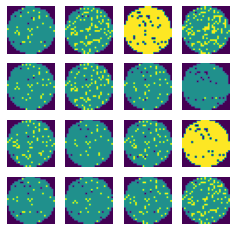

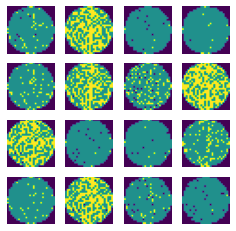

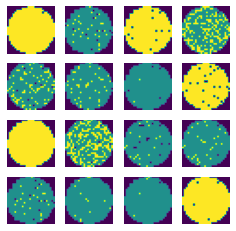

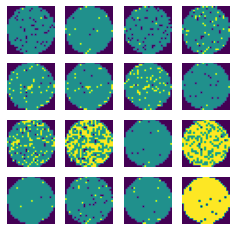

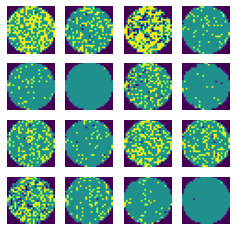

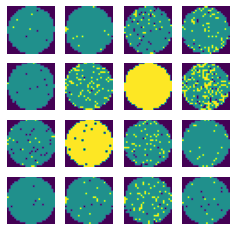

In [63]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

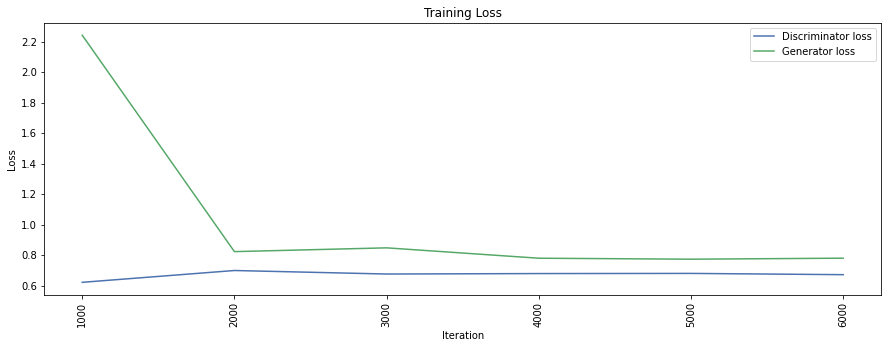

In [64]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

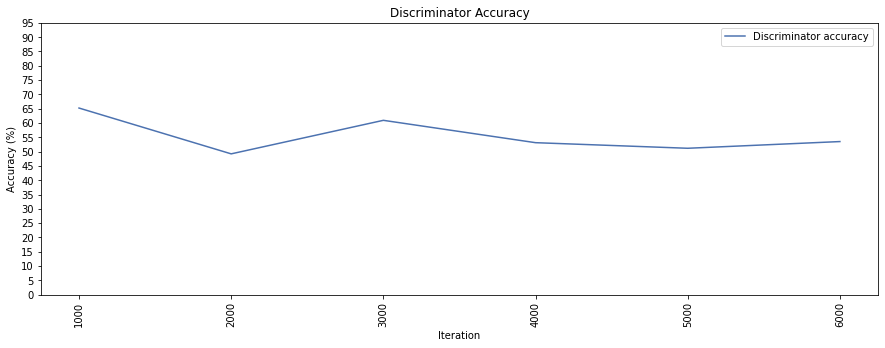

In [65]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

### GAN (none 제외)

In [91]:
x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [92]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17098, 26, 26, 1), y shape : (17098, 26, 26, 1)


In [95]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Build and compile the Discriminator
discriminator_except_none = build_discriminator(img_shape)
discriminator_except_none.compile(loss='binary_crossentropy',
                      optimizer=adam,
                      metrics=['accuracy'])

# Build the Generator
generator_except_none = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator_except_none.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan_except_none = build_gan(generator_except_none, discriminator_except_none)
gan_except_none.compile(loss='binary_crossentropy', optimizer=adam)

Training

In [96]:
losses = []
accuracies = []
iteration_checkpoints = []

def train_except_none(iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train_except_none

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator_except_none.predict(z)

        # Train Discriminator
        d_loss_real = discriminator_except_none.train_on_batch(imgs, real)
        d_loss_fake = discriminator_except_none.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator_except_none.predict(z)

        # Train Generator
        g_loss = gan_except_none.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator_except_none)

1000 [D loss: 0.617374, acc.: 79.69%] [G loss: 0.979663]
2000 [D loss: 0.662887, acc.: 56.64%] [G loss: 0.814722]
3000 [D loss: 0.686743, acc.: 59.38%] [G loss: 0.751163]
4000 [D loss: 0.690027, acc.: 45.31%] [G loss: 0.733089]
5000 [D loss: 0.677126, acc.: 55.08%] [G loss: 0.743069]
6000 [D loss: 0.682962, acc.: 53.12%] [G loss: 0.776322]


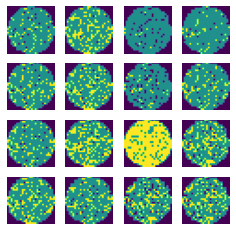

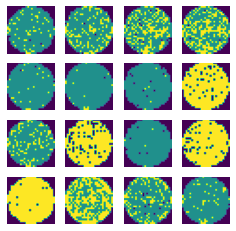

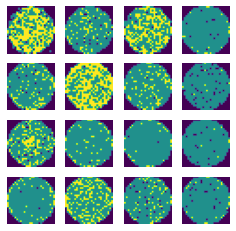

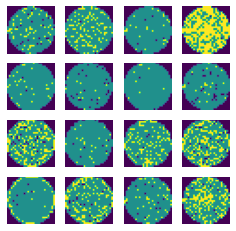

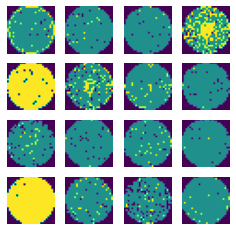

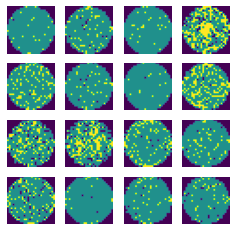

In [97]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train_except_none(iterations, batch_size, sample_interval)

https://github.com/GANs-in-Action/gans-in-action/blob/master/chapter-3/Chapter_3_GAN.ipynb

### DCGAN (none 제외)

In [57]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, y,
                                                    test_size=0.33,
                                                    stratify=y, random_state=42)

x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [58]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17098, 26, 26, 3), y shape : (17098, 26, 26, 3)


In [159]:
img_rows = 26
img_cols = 26
channels = 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [181]:
def build_dcgenerator(img_shape, z_dim):
    model = keras.models.Sequential()
    dropout = 0.4
    depth = 16*4
    dim = 13
    model.add(keras.layers.Dense(dim*dim*depth, input_dim=z_dim))
    model.add(keras.layers.BatchNormalization(momentum=0.9))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Reshape((dim, dim, depth)))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.UpSampling2D())
    model.add(keras.layers.Conv2DTranspose(int(depth/2), 5, padding='same'))
    model.add(keras.layers.BatchNormalization(momentum=0.9))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Conv2DTranspose(int(depth/4), 5, padding='same'))
    model.add(keras.layers.BatchNormalization(momentum=0.9))
    model.add(keras.layers.Activation('relu'))
    #model.add(keras.layers.Conv2DTranspose(int(depth/8), 5, padding='same'))
    #model.add(keras.layers.BatchNormalization(momentum=0.9))
    #model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Conv2DTranspose(3, 5, padding='same'))
    model.add(keras.layers.Activation('sigmoid'))
    model.summary()
    return model

def build_dcdiscriminator(img_shape):
    model = keras.models.Sequential()
    dropout = 0.4
    depth = 16
    model.add(keras.layers.Conv2D(depth*1, 5, strides=2, input_shape=img_shape, padding='same'))
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Conv2D(depth*2, 5, strides=2, padding='same'))
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Conv2D(depth*4, 5, strides=2, padding='same'))
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Conv2D(depth*8, 5, strides=1, padding='same'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.summary()
    return model

In [182]:
def build_dcgan(generator, discriminator):
  model = keras.models.Sequential()
  
  # Combined Generator -> Discriminator model
  model.add(generator)
  model.add(discriminator)

  return model

In [206]:
adam_d = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.5)
adam_g = tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.5)

# Build and compile the Discriminator
discriminator = build_dcdiscriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_d,
                      metrics=['accuracy'])

# Build the Generator
generator = build_dcgenerator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_dcgan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=adam_g)

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 13, 13, 16)        1216      
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 64)        

Training

In [207]:
from tqdm import tqdm

In [208]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train_except_none

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in tqdm(range(iterations)):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [209]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1, 2]
    gen_imgs = np.argmax(gen_imgs, axis=-1)

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :])
            axs[i, j].axis('off')
            cnt += 1

 17%|█▋        | 999/6000 [44:13<3:41:19,  2.66s/it]

1000 [D loss: 0.375949, acc.: 81.64%] [G loss: 2.406415]


 17%|█▋        | 1000/6000 [44:17<3:50:57,  2.77s/it]

(16, 26, 26)
[[0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 33%|███▎      | 1999/6000 [1:28:28<2:57:03,  2.66s/it]

2000 [D loss: 0.542367, acc.: 70.31%] [G loss: 1.710434]


 33%|███▎      | 2000/6000 [1:28:31<3:12:48,  2.89s/it]

(16, 26, 26)
[[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 0 0]
 [0 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 50%|████▉     | 2999/6000 [2:12:44<2:14:21,  2.69s/it]

3000 [D loss: 0.575280, acc.: 70.31%] [G loss: 1.234677]


 50%|█████     | 3000/6000 [2:12:47<2:16:29,  2.73s/it]

(16, 26, 26)
[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1 2 1 1 2 2 2 2 2 1 2 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 1 2 1 2 1 1 2 1 1 1 2 2 2 1 0 0 0 0 0]
 [0 0 0 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 0 0 0 0]
 [0 0 0 1 2 1 2 2 2 2 1 1 1 2 2 1 1 2 1 2 1 2 1 0 0 0]
 [0 0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 0 0]
 [0 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 1 0 0]
 [1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 0]
 [1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 2 1 1 1 1 2 1]
 [1 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1]
 [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2]
 [2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2]
 [2 1 1 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2]
 [2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2]
 [0 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2 1 1 0]
 [1 2 1 2 1 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 2 2 1 2 1]
 [1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 

 51%|█████▏    | 3085/6000 [2:16:34<2:09:02,  2.66s/it]


KeyboardInterrupt: ignored

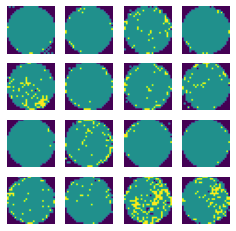

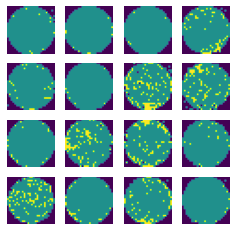

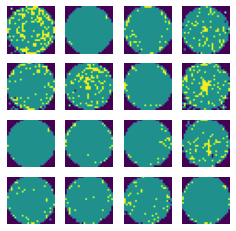

In [210]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

https://neurowhai.tistory.com/272

### CAE (none 제외)

In [94]:
# Encoder
input_shape = (26, 26, 3)
input_tensor = Input(input_shape)
depth = 64
encode = keras.layers.Conv2D(depth, (3,3), padding='same', activation='relu')(input_tensor)

latent_vector = keras.layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(depth, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',
              loss = 'mse',
             )

In [95]:
ae.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 26, 26, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 13, 13, 64)        36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 26, 26, 3)         1731      
Total params: 40,451
Trainable params: 40,451
Non-trainable params: 0
_______________________________________________________

In [96]:
# parameter
epoch=7
batch_size=128

In [97]:
# start train
ae.fit(x_train_except_none, x_train_except_none,
       batch_size=batch_size,
       epochs=epoch,
       verbose=2)

Epoch 1/7
134/134 - 38s - loss: 0.0648
Epoch 2/7
134/134 - 38s - loss: 0.0259
Epoch 3/7
134/134 - 37s - loss: 0.0152
Epoch 4/7
134/134 - 38s - loss: 0.0106
Epoch 5/7
134/134 - 38s - loss: 0.0080
Epoch 6/7
134/134 - 38s - loss: 0.0062
Epoch 7/7
134/134 - 38s - loss: 0.0051


In [99]:
# Make encoder model with part of autoencoder model layers
encoder = models.Model(input_tensor, latent_vector)

In [100]:
# Make decoder model with part of autoencoder model layers
decoder_input = Input((13, 13, 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)

decoder = models.Model(decoder_input, output_tensor(decode))

In [101]:
faulty_case

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype='<U9')

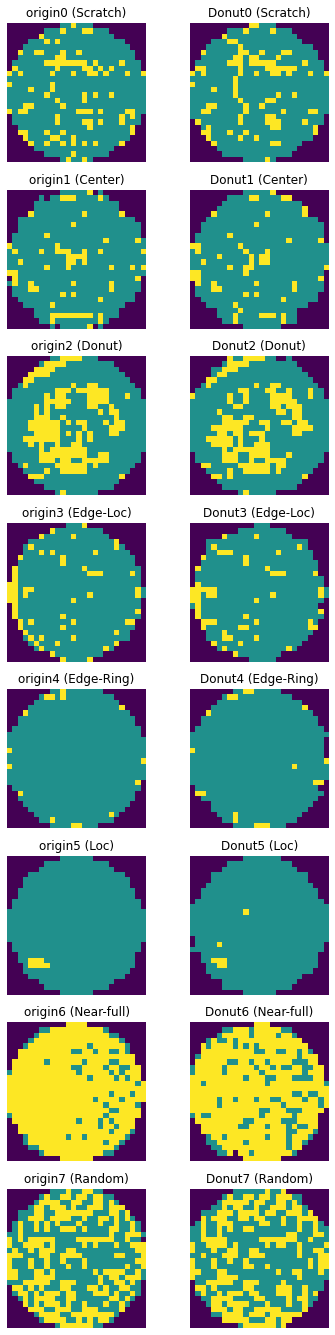

In [103]:
rows = len(faulty_case) - 1
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for row in range(rows):
  f = faulty_case[r]

  wafer = x_train_except_none[np.where(y_train_except_none==f)[0]][0]
  
  r = row
  ax = axes[r][0]
  ax.imshow(np.argmax(wafer, axis = -1))
  ax.set_title("origin" + str(row) + " (" + str(f) + ")")
  ax.axis('off')

  encoded_x = encoder.predict(wafer[np.newaxis])
  noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.5, size = (1, 13, 13, 64))  # noise 강하게 줌

  ax2 = axes[r][1]
  ax2.imshow(np.argmax(decoder.predict(noised_encoded_x)[0], axis=-1))
  ax2.set_title(failureType_cols[col] + str(row) + " (" + str(f) + ")")
  ax2.axis('off')
plt.show()

Error! 세션 끊김

In [104]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)
    
    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, 26, 26, 3))
    
    # Make wafer until total # of wafer to 4000
    for i in range((4000//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.5, size = (len(encoded_x), 13, 13, 64)) 
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    gen_y = np.full((len(gen_x), 1), label)
    
    return gen_x[1:], gen_y[1:]

In [ ]:
for f in faulty_case : 
    # skip none case
    if f == 'none' : 
        continue

    gen_x, gen_y = gen_data(x_train[np.where(y_train == f)[0]], f)
    x_train = np.concatenate((x_train, gen_x), axis=0)
    y_train = np.concatenate((y_train, gen_y))

In [ ]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)
    
    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, 26, 26, 3))
    
    # Make wafer until total # of wafer to 2000
    for i in range((2000//len(wafer)) + 1):
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 13, 13, 64)) 
        noised_gen_x = decoder.predict(noised_encoded_x)
        gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
    gen_y = np.full((len(gen_x), 1), label)
    
    return gen_x[1:], gen_y[1:]

In [ ]:
# Augmentation for all faulty case.
for f in faulty_case : 
    # skip none case
    if f == 'none' : 
        continue
    
    gen_x, gen_y = gen_data(x_train[np.where(y==f)[0]], f)
    x_train = np.concatenate((x_train, gen_x), axis=0)
    y_train = np.concatenate((y_train, gen_y))

In [ ]:
print('After Generate new_x shape : {}, new_y shape : {}'.format(x_train.shape, y_train.shape))

After Generate new_x shape : (30707, 26, 26, 3), new_y shape : (30707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y_train[y_train==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 13489


In [ ]:
# choice index without replace.
none_idx = np.where(y_train=='none')[0][np.random.choice(len(np.where(y_train=='none')[0]), size=11000, replace=False)]

In [ ]:
# delete choiced index data.
new_x_train = np.delete(x_train, none_idx, axis=0)
new_y_train = np.delete(y_train, none_idx, axis=0)

In [ ]:
print('After Delete "none" class new_x shape : {}, new_y shape : {}'.format(new_x_train.shape, new_y_train.shape))

After Delete "none" class new_x shape : (19707, 26, 26, 3), new_y shape : (19707, 1)


In [ ]:
for f in faulty_case :
    print('{} : {}'.format(f, len(new__train[new_y_train==f])))

Center : 2160
Donut : 2002
Edge-Loc : 2368
Edge-Ring : 2046
Loc : 2376
Near-full : 2032
Random : 2146
Scratch : 2088
none : 2489


In [ ]:
from tensorflow.keras.utils import to_categorical
for i, l in enumerate(faulty_case):
    new_y_train[new_y_train==l] = i
    y_test[y_test==l] = i
    
new_y_train = to_categorical(new_y_train)
y_test = to_categorical(y_test)

# 5. 모델 

In [ ]:
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
def CNN_Basic():
  input = keras.Input(shape = (26,26,3))
  y = keras.layers.Conv2D(16, kernel_size = (3,3), padding = 'same', activation = 'relu')(input)
  y = keras.layers.BatchNormalization()(y)
  y = keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same')(y)
  y = keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')(y)
  y = keras.layers.BatchNormalization()(y)
  y = keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same')(y)
  y = keras.layers.Flatten()(y)
  y = keras.layers.Dense(9, activation = "softmax")(y)

  model = keras.Model(input, y)
  return model

model = CNN_Basic()

model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy', precision, recall, f1score])
model.summary()

In [ ]:
hist = model.fit(new_x_train, y_train, validation_data=(x_test,y_test),epochs = 40, verbose =1, callbacks= callbacks)

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.title('Accuracy')
ax1.legend(['accuracy', 'val_accuracy'])

ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.title('loss')
ax1.legend(['loss', 'val_loss'])

plt.show()